In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pickle

In [3]:
import os

path = "dataset/train/"
files = os.listdir(path)[:6]
print(files)

classes={'1':0, '2':1, '3':2, '4':3, '5':4, '6':5}

['1', '2', '3', '4', '5', '6']


In [4]:
import cv2

X=[]
Y=[]

for cl in classes:
    pth = path+cl
    for img_name in os.listdir(pth):
        img = cv2.imread(pth+"/"+img_name,0)
        X.append(img)
        Y.append(classes[cl])
print("Dataset created succesfully!")        

Dataset created succesfully!


In [40]:
pd.Series(Y).value_counts()

0    192
1    192
2    192
3    192
4    192
5    192
dtype: int64

In [1]:
X[0].shape

NameError: name 'X' is not defined

In [42]:
print(type(X))
X = np.array(X)
Y = np.array(Y)
print(type(X))

<class 'list'>
<class 'numpy.ndarray'>


0


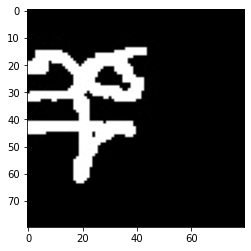

In [43]:
plt.imshow(X[100],cmap="gray")
print(Y[100])

In [44]:
X.shape

(1152, 80, 80)

In [45]:
X_new = X.reshape(len(X),-1)
print(X_new.shape)
print(Y.shape)

(1152, 6400)
(1152,)


In [46]:
print(X.shape)
print(X.ndim)
print(X_new.ndim)

(1152, 80, 80)
3
2


In [47]:
#Spilling data

xtrain, xtest, ytrain, ytest = train_test_split(X_new, Y,
                                               test_size=.20, random_state=10)

In [48]:
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(921, 6400) (921,)
(231, 6400) (231,)


In [49]:
print(xtrain.max())
print(xtest.max())
x_train = xtrain/255
x_test = xtest/255
print(x_train.max())
print(x_test.max())

255
255
1.0
1.0


In [50]:
from sklearn.decomposition import PCA

In [51]:
print(x_train.shape, x_test.shape)
pca = PCA(.98)
xtrain = pca.fit_transform(x_train)
xtest = pca.fit_transform(x_test)
print(xtrain.shape, xtest.shape)
print(pca.n_components)
print(pca.n_features_)

(921, 6400) (231, 6400)
(921, 391) (231, 167)
0.98
6400


In [52]:
ytest[:10]

array([3, 3, 4, 3, 3, 2, 4, 5, 5, 0])

In [55]:
log = LogisticRegression(solver='lbfgs', max_iter=100 )
log.fit(xtrain, ytrain)

C:\Users\Moe\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [64]:
model = LogisticRegression(fit_intercept=True,
                           solver = 'saga',
                           max_iter = 1000,
                           verbose = 1,
                           tol=0.01)

In [67]:
model.fit(xtrain, ytrain)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 25 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished


LogisticRegression(max_iter=1000, solver='saga', tol=0.01, verbose=1)

In [68]:
model.save('regressionModel.h5')

AttributeError: 'LogisticRegression' object has no attribute 'save'

In [71]:
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))